## Bài toán dự đoán giá nhà
- Đưa vào các thuộc tính căn nhà dự đoán giá (price)

### Bài tập
- Tiền xử lý dữ liệu cho trước: dữ liệu dự đoán giá nhà (xem thêm tại https://www.kaggle.com/harlfoxem/housesalesprediction)
- Xây dựng và đánh giá các mô hình KNN, Random Forest, Linear Regression, Ridge, Lasso
- Lựa chọn các siêu tham số cho từng mô hình
- So sánh các mô hình với nhau

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [2]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
dataset.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

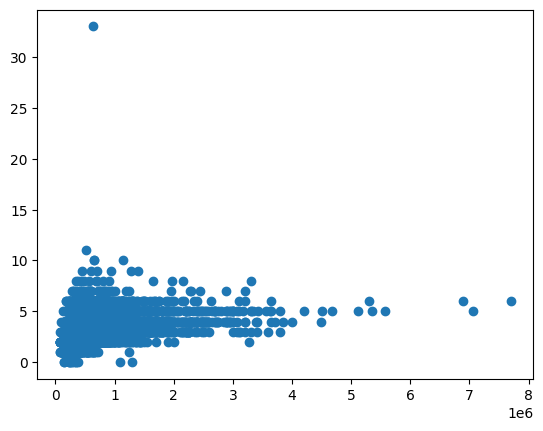

In [5]:
plt.scatter(dataset.price,dataset.bedrooms)

In [7]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
dataset.drop(columns=['date','id','zipcode','sqft_lot','sqft_lot15'],inplace=True)
dataset.head()

price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  221900.0         3       1.00         1180     1.0           0     0   
1  538000.0         3       2.25         2570     2.0           0     0   
2  180000.0         2       1.00          770     1.0           0     0   
3  604000.0         4       3.00         1960     1.0           0     0   
4  510000.0         3       2.00         1680     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

       lat     long  sqft_living15  
0  47.5112 -122.257           1340  
1  47.7210 -122.319           1690  
2  47.7379 -122.233           2720  
3  47.5208 -122.393           1360  
4  47.6168 -122.045           1800

In [10]:
x = dataset.drop(columns='price',axis=1)
y = dataset['price']
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 10)

Linear Regression

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)


LinearRegression()

Ridge Regression

In [17]:
ridge_model = Ridge()
param_ridge_model = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
grid_ridge = GridSearchCV(ridge_model, param_ridge_model, cv=5)
grid_ridge.fit(X_train, y_train)

print(grid_ridge.best_params_)

{'alpha': 0.1}


In [19]:
lasso_model = Lasso()
param_lasso_model = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
grid_lasso_model = GridSearchCV(lasso_model, param_lasso_model, cv=5)
grid_lasso_model.fit(X_train, y_train)

print(grid_lasso_model.best_params_)

{'alpha': 100}


Random Forest

In [40]:
param_grid = {
    'n_estimators': [200, 300], 
    'max_depth': [13, 15],               
    'min_samples_split': [ 15],        
    'min_samples_leaf': [15]           
}
rfmodel = RandomForestRegressor(random_state= 10)
grid_rf = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=5, scoring= 'accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best Parameters: {'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 200}


In [39]:
knn_model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [7, 8, 9, 10, 11], 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Thuật toán tìm kiếm
}

grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)

Best parameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'uniform'}


Compare

In [38]:
models = {
    'KNN': grid_knn.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'Linear Regression': lr_model,
    'Ridge': grid_ridge.best_estimator_,
    'Lasso': grid_lasso_model.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

KNN - RMSE: 246519.67, R²: 0.58
Random Forest - RMSE: 165558.71, R²: 0.81
Linear Regression - RMSE: 210604.68, R²: 0.70
Ridge - RMSE: 210473.70, R²: 0.70
Lasso - RMSE: 210525.66, R²: 0.70
